In [1]:
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### Setting the distribution that we will generate the data from

In [2]:
#the seed for reproducability
np.random.seed(42)
#means
class_means = np.array([-3.0, -1.0, 3.0])
#stds
class_deviations = np.array([1.2, 1.0, 1.3])
#sample sizes
class_sizes = np.array([50, 65, 40])



### Generating the data from the distribution

In [3]:
points1 = np.random.normal(loc = class_means[0], scale = class_deviations[0], size = class_sizes[0])
points2 = np.random.normal(loc = class_means[1], scale = class_deviations[1], size = class_sizes[1])
points3 = np.random.normal(loc = class_means[2], scale = class_deviations[2], size = class_sizes[2])


#so we will have two arrays, holding the x and y values, can be accessed via index, however do note we are working with one d data.

points = np.concatenate((points1, points2, points3))
y = np.concatenate((np.repeat(1, class_sizes[0]),
                    np.repeat(2, class_sizes[1]),
                    np.repeat(3, class_sizes[2])))

## Export data to a csv

In [4]:
np.savetxt(fname = "lab01_dataset.csv",
           X = np.stack((points, y), axis = 1),
           fmt = "%f, %d")

## Plotting Data

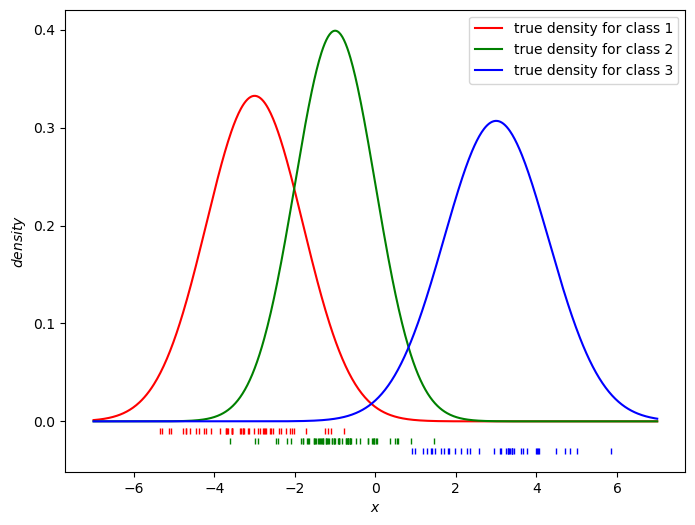

In [5]:

#to plot we get values from the distribution, as many as we want and them plot them with interpolation
data_interval = np.linspace(start = -7, stop = +7, num = 701)
density1 = stats.norm.pdf(data_interval, loc = class_means[0], scale = class_deviations[0])
density2 = stats.norm.pdf(data_interval, loc = class_means[1], scale = class_deviations[1])
density3 = stats.norm.pdf(data_interval, loc = class_means[2], scale = class_deviations[2])

plt.figure(figsize = (8,6))
plt.plot(points1, np.repeat(-0.01, class_sizes[0]), "r|", markersize = 5)
plt.plot(data_interval, density1, "r", label = "true density for class 1")

plt.plot(points2, np.repeat(-0.02, class_sizes[1]), "g|", markersize = 5)
plt.plot(data_interval, density2, "g", label = "true density for class 2")

plt.plot(points3, np.repeat(-0.03, class_sizes[2]), "b|", markersize = 5)
plt.plot(data_interval, density3, "b", label = "true density for class 3")

plt.xlabel("$x$")
plt.ylabel("$density$")
plt.legend()
plt.show()

## Importing the Data (Acutal ML Experiment Resemblance starts from here, the first part was about data visualization and generation)

In [6]:
# read data into memory
data_set = np.genfromtxt(fname= "lab01_dataset.csv", delimiter = ",")
print(data_set.shape)

#get x and y values
x = data_set[:, 0]
y = data_set[:, 1].astype(int)

#get number of classes and number of samples
K = np.max(y)
N = data_set.shape[0]
print(N, K)

(155, 2)
155 3


## Parameter Estimation
#### From MLE

##### It's my first time working with math notation in latex / jupyter
##### So, the first few lines are some just random stuff work exercise.
$$ y = a + bx $$
$$a_{1} y^{2}$$

$$\hat{\mu}_c = \dfrac{\sum\limits_{i=1}^{N} x_{i} \mathbb{1}(y_{i} = c)}{\sum\limits_{i=1}^{N}\mathbb{1}(y_{i} = c)}$$

$$ \sum\limits_{i=1}^{N}\mathbb{1}(y_{i} = c) = N_{c}$$

In [7]:
# calculate sample means
sample_means = [np.mean(x[y == (c+1)]) for c in range(K)]
print(sample_means)
##this way of indexing is really cool tbh.

[-3.2705685800000004, -0.9879923692307693, 2.9540585]


$$ \hat{\sigma}_{c}^{2} = \dfrac {\sum\limits_{i=1}^{N} (x_{i} - \mu_{i})^{2} \mathbb{1}(y_{i} = c)} 
{N_{c}} $$


In [8]:
sample_deviations = [np.sqrt(np.mean((x[y==c+1] - sample_means[c])**2)) for c in range(K)]

print(sample_deviations)

[1.1091418757758646, 0.9118486774535576, 1.211743975412195]


$$\widehat{\Pr}(y=c) = \dfrac{\sum\limits_{i=1}^{N}\mathbb{1}(y_{i} = c)}{N}$$

In [9]:
#calculate prior probabilities
class_priors = [np.mean(y == c + 1) for c in range(K)]
print(class_priors)

[0.3225806451612903, 0.41935483870967744, 0.25806451612903225]


##### Now that we have the params let's draw the distribution and then make classification

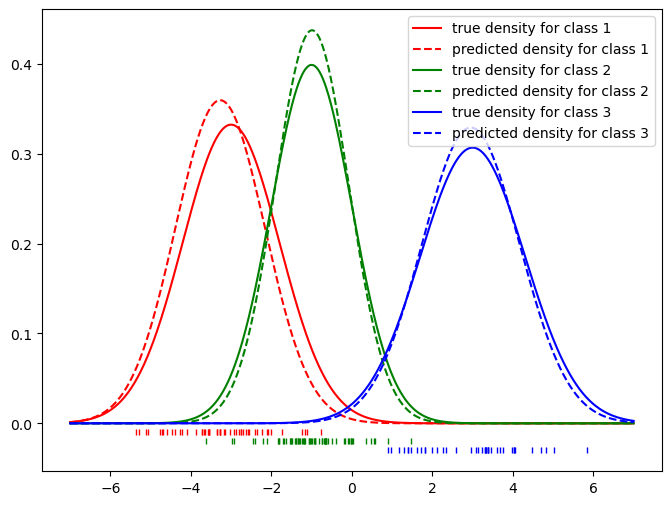

In [10]:
density1_hat = stats.norm.pdf(data_interval, loc = sample_means[0], scale = sample_deviations[0])
density2_hat = stats.norm.pdf(data_interval, loc = sample_means[1], scale = sample_deviations[1])
density3_hat = stats.norm.pdf(data_interval, loc = sample_means[2], scale = sample_deviations[2])

plt.figure(figsize = (8, 6))
#copy from the previous cell and added predicted distribution
plt.plot(points1, np.repeat(-0.01, class_sizes[0]), "r|", markersize = 5)
plt.plot(data_interval, density1, "r", label = "true density for class 1")
plt.plot(data_interval, density1_hat, "r--", label = "predicted density for class 1")

plt.plot(points2, np.repeat(-0.02, class_sizes[1]), "g|", markersize = 5)
plt.plot(data_interval, density2, "g", label = "true density for class 2")
plt.plot(data_interval, density2_hat, "g--", label = "predicted density for class 2")

plt.plot(points3, np.repeat(-0.03, class_sizes[2]), "b|", markersize = 5)
plt.plot(data_interval, density3, "b", label = "true density for class 3")
plt.plot(data_interval, density3_hat, "b--", label = "predicted density for class 3")

plt.legend()
plt.show()


## Classificaiton using the predicted dists (argmax)

$${g}_{c}(x) = \log\hat{p}(x | y = c) + \log\widehat{\Pr}(y = c)$$
$$ = -\dfrac{1}{2}\log(2\pi\hat{\sigma}_{c}^{2}) -\dfrac{(x - \hat{\mu}_{c})^{2}}{2\hat{\sigma}_{c}^{2}}
+\log\widehat{\Pr}(y = c)$$

In [11]:
#we will evaluate the score functions as well to graph them, and pick the max over the intervals.
score_values = np.stack([-0.5 * np.log(2 * math.pi * sample_deviations[c] ** 2)
-0.5 * (data_interval - sample_means[c]) ** 2 / sample_deviations[c] ** 2
+ np.log(class_priors[c]) for c in range(K)])



### Notice how the scores are negative (logs of values that in the range [0, 1]

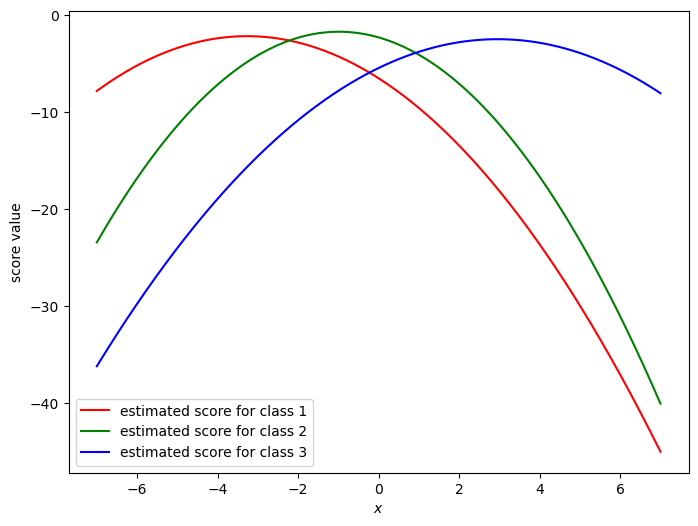

In [12]:
plt.figure(figsize = (8, 6))

plt.plot(data_interval, score_values[0], "r", label = "estimated score for class 1")
plt.plot(data_interval, score_values[1], "g", label = "estimated score for class 2")
plt.plot(data_interval, score_values[2], "b", label = "estimated score for class 3")

plt.xlabel("$x$") #dollar signs here make text italic.
plt.ylabel("score value")

plt.legend()
plt.show()

#### Ok, we have the scores, but i guess we have to calculate the posteriors as well.
#####
First remember the bayes rule

$$ Pr(Y|X) = \dfrac{P(X|Y)\Pr(Y)}{P(X)} $$

## Take log


$$ \log(\Pr(Y|X)) = \log(P(X|Y)) + \log(\Pr(Y)) - \log(P(X))$$

#### However, do notice that the log's of probabilities are always nonpositive, so our log posteriors or score functions will also be nonpositive. but we can just take the exponential if we want to see the actual probabilities.

#### Writing the estimates with hats for better notation here.

$$ \log\widehat{\Pr}(y = c |x) = \log\hat{p}(x | y = c) + \log\widehat{\Pr}(y = c) - \log\hat{p}(x)$$

#### Summing over marginal probabilities to find p(x), or notice that that the probabilities should sum up to one, therefore:
$$ \log\hat{p}(x) = \log\left(\sum\limits_{c=1}^{K}\hat{p}(x|y=c)\widehat{\Pr}(y=c)\right) $$


#### Also, think about what could happen if the scores were very large or small? Well we are taking the exponents of them therefore underflow or overflow could very well occur, so we use this very well known popular property.

$$ \log\left(\sum\limits_{i=1}^{N}\exp(x_{i})\right) = m +  \log\left(\sum\limits_{i=1}^{N}\exp(x_{i} - m)\right) $$

where $m = \max(x_{1}, x_{2},...,x_{n}) $

#### Now if we know, all three terms we can get the log posterior and then we can just take its exponential to get the actual prob estimate.




In [13]:
print(score_values[:, 100])

[ -3.3695603  -11.37508451 -24.00951938]


In [14]:
#calculating the log posteriors, also using the max technqiue in log sums of exps to avoid overflow or underflow.
#also this way of indexing in numpy might seem strange for the first time, but it literally returns for each x, the score values.
log_posteriors = score_values - [np.max(score_values[:,r]) + 
                                 np.log(np.sum(np.exp(score_values[:,r] - np.max(score_values[:,r]))))
                                       for r in range(score_values.shape[1])]

#### Now that we have calculated the log posteriors on the interval lets plot them and see how our classifier would work.

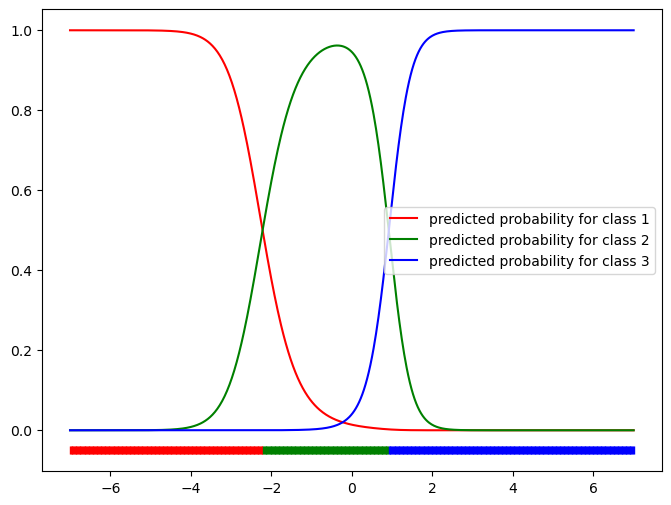

In [33]:
plt.figure(figsize = (8, 6))

plt.plot(data_interval, np.exp(log_posteriors[0]), "r", label = "predicted probability for class 1")
plt.plot(data_interval, np.exp(log_posteriors[1]), "g", label = "predicted probability for class 2")
plt.plot(data_interval, np.exp(log_posteriors[2]), "b", label = "predicted probability for class 3")


# argmax returns the indices of the max along an axis. 
class_assignments = np.argmax(score_values, axis = 0)


#np.sum(class_assignments = k) literally returns the number of elements with that class assignment because true is 1 and false is zero.

#so for each x where class_assignment is k, you just print some y value, that is what np.repeat does here actually.
plt.plot(data_interval[class_assignments == 0], np.repeat(-0.05, np.sum(class_assignments == 0)), "r|")
plt.plot(data_interval[class_assignments == 1], np.repeat(-0.05, np.sum(class_assignments == 1)), "g|")
plt.plot(data_interval[class_assignments == 2], np.repeat(-0.05, np.sum(class_assignments == 2)), "b|")



plt.legend()
plt.show()